<a href="https://colab.research.google.com/github/A01706648/TC3006C_Deliver/blob/main/m1/M1_Delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **General Questions:**

**By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?**

**size:**

We shall consider the firm's total assert, minus the firm's total totalliabilities

But since most of the US firm is in a very high levarage,
We may only need to use firm's total assert as its real size


**Sale performance:**

We shall consdier firm's revenue

**Profitability**

We shall consider the profit margine of the firm


**Why some firms are more profitable than others?**

**Which factors/variables from financial statements are related to stock returns?**


#**Specific Questions:**



In [3]:
isGoogleColab = False

if(isGoogleColab):
    from google.colab import drive
import pandas as pd
import numpy as np
import plotly.express as px

In [4]:
industry_dict = {'Accommodation and Food Services':'Services',
       'Administrative and Support and Waste Management and Remediation Services':'Services',
       'Agriculture, Forestry, Fishing and Hunting':'Agriculture',
       'Arts, Entertainment, and Recreation':'Services', 
       'Construction':'Construction',
       'Educational Services':'Services', 
       'Finance and Insurance':'Finance',
       'Health Care and Social Assistance':'Services', 
       'Information':'Services',
       'Manufacturing':'Manufacturing', 
       'Mining, Quarrying, and Oil and Gas Extraction':'Mining',
       'Other Services (except Public Administration)':'Services',
       'Professional, Scientific, and Technical Services':'Services',
       'Real Estate and Rental and Leasing':'Finance', 
       'Retail Trade':'Comercial',
       'Transportation and Warehousing':'Services', 
       'Utilities':'Energy', 
       'Wholesale Trade':'Comercial'}

In [5]:
if(isGoogleColab):
    drive.mount("/content/gdrive") 
    %cd "/content/gdrive/MyDrive/Machine Learning/deliver/M1"
df = pd.read_csv('us2022q2a.csv')
df_firm = pd.read_csv('usfirms2022.csv')

In [48]:
bIsAproachNew = False

df_more = df.copy()

#put industry column
firm_list = df['firm'].unique()
firm_list = firm_list.tolist()
firm_list.remove(np.nan)
df_firm_more = df_firm.copy()
df_firm_more['industry'] = df_firm_more['Sector NAICS\nlevel 1']
df_firm_more = df_firm_more.replace({'industry': industry_dict})

firm_industry_dic = {}

if(bIsAproachNew):
  firm_industry_dic_temp = {}

  for count in range(df_firm_more['Ticker'].count()):
    firm_industry_dic_temp[df_firm_more['Ticker'][count]] = df_firm_more['industry'][count]

  #print(firm_industry_dic_temp)
else:
  for firm in firm_list:
    if (len((df_firm_more[df_firm_more['Ticker'] == firm]['industry']).values.tolist()) > 0):
      firm_industry_dic[firm] = ((df_firm_more[df_firm_more['Ticker'] == firm]['industry']).values.tolist())[0]
    else:
      firm_industry_dic[firm] = np.nan

for firm in firm_list:
  if((len(firm) > 0) and (firm in firm_industry_dic_temp)):
    if(bIsAproachNew):
      firm_industry_dic[firm] = firm_industry_dic_temp[firm]
    else:
      firm_industry_dic[firm] = ((df_firm_more[df_firm_more['Ticker'] == firm]['industry']).values.tolist())[0]
  else:
    firm_industry_dic[firm] = np.nan

df_more['industry'] = df_more['firm']
df_more = df_more.replace({'industry': firm_industry_dic})


#put country column
firm_country_dict = {}
for count in range(df_firm['Ticker'].count()):
    firm = df_firm['Ticker'][count]
    country = df_firm['Country\nof Origin'][count]
    firm_country_dict[firm] = country

df_more['country'] = df_more['firm']
df_more = df_more.replace({'country':firm_country_dict})
df_more

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,industry,country
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0,Manufacturing,US
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0,Manufacturing,US
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0,Manufacturing,US
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0,Manufacturing,US
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0,Manufacturing,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0,Manufacturing,US
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0,Manufacturing,US
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0,Manufacturing,US
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,...,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0,Manufacturing,US


In [49]:


#Calculate bookvalue
df_more['bookvalue'] = df_more['totalassets'] - df_more['totalliabilities']

#Calculate Market Value
df_more['marketvalue'] = df_more['originalprice'] * df_more['sharesoutstanding']

#Calculate Operating profit margin
df_more['op_profit'] = df_more['revenue'] - df_more['cogs'] - df_more['sgae'] - df_more['otheropexp']
df_more['op_profit_margin'] = df_more['op_profit'] / df_more['revenue']
df_more['net_income'] = df_more['op_profit'] - df_more['incometax'] - df_more['finexp'] + df_more['extraincome']
df_more['profit_margin'] = df_more['net_income'] / df_more['revenue']




In [50]:
df_more.head()

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,year,cto,industry,country,bookvalue,marketvalue,op_profit,op_profit_margin,net_income,profit_margin
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,1.0,Manufacturing,US,NaN,4.700800e+07,NaN,NaN,NaN,NaN
1,A,2000q2,2485000.0,1261000.0,1010000.0,0.0,42000.0,0.0,90000.0,7321000.0,...,2000.0,2.0,Manufacturing,US,4642000.0,3.335506e+07,214000.0,0.086117,166000.0,0.066801
2,A,2000q3,2670000.0,1369000.0,1091000.0,0.0,28000.0,0.0,83000.0,7827000.0,...,2000.0,3.0,Manufacturing,US,4902000.0,2.216940e+07,210000.0,0.078652,155000.0,0.058052
3,A,2000q4,3372000.0,1732000.0,1182000.0,0.0,10000.0,0.0,163000.0,8425000.0,...,2000.0,4.0,Manufacturing,US,5265000.0,2.498606e+07,458000.0,0.135824,305000.0,0.090451
4,A,2001q1,2841000.0,1449000.0,1113000.0,0.0,-6000.0,0.0,119000.0,9208000.0,...,2001.0,1.0,Manufacturing,US,5541000.0,1.403653e+07,279000.0,0.098205,154000.0,0.054206


In [51]:
industry_list = df_more['industry'].unique()
industry_list = industry_list.tolist()
del industry_list[-1]
del industry_list[-1]
industry_list

['Manufacturing',
 'Finance',
 'Services',
 'Comercial',
 'Energy',
 'Construction',
 'Agriculture',
 'Mining']

In [52]:
#Show how many firms by industry there are in the sample
industry_firm_num = []
for industry in industry_list:
  industry_firm_num.append(len(df_more[df_more['industry'] == industry]['firm'].unique()))

df_industry_firm_num = pd.DataFrame({'Industry':industry_list,'firm num':industry_firm_num})
df_industry_firm_num

,Industry,firm num
0,Manufacturing,1565
1,Finance,769
2,Services,792
3,Comercial,231
4,Energy,77
5,Construction,45
6,Agriculture,16
7,Mining,103


**For each industry (and for all industries),**

**what can you say about the typical firm size in terms of market value and book value?**

We analyze the last quater of the market value and book value of all the firms for each industry.

We can see the dispersion in the box plot below.

They are very dispersive.

So we are going to use the median value of the market value and book value,

to indicate the typical firm size.

In [54]:
df_final_size = df_more.dropna()
df_final_size = df_final_size.groupby('firm').last()
#df_final_size

In [55]:
df_final_size.groupby('industry').median()[['bookvalue', 'marketvalue']]

,bookvalue,marketvalue
industry,,
Agriculture,1068506.5,1.264045e+06
Comercial,565853.0,1.438305e+06
Construction,998146.5,1.900822e+06
Energy,2845900.0,6.040649e+06
Finance,1038181.0,1.785152e+06
Manufacturing,229197.5,5.913003e+05
Mining,679456.0,1.042405e+06
Services,443680.5,1.828864e+06


In [56]:
#df_final_size[df_final_size['industry'] == 'Manufacturing']['bookvalue'].describe()

**How much these variables change within each industry?**

**How firm size (in market value) is distributed?**

In [57]:
px.box(df_final_size, x='industry', y='bookvalue', title='Book Value of all industries')

In [58]:
px.box(df_final_size, x='industry', y='marketvalue', title='Market Value of all industries')

For each industry (and for all industries), 

what can you say about profit margin of firms? 

a) descriptive statistics of profit margin and 
for the profit margin for the last quater of all industry

In [59]:
desc_dict = {'count':[], 'mean':[], 'std':[], 'min':[], '25%':[], '50%':[], '75%':[], 'max':[]}

for industry in industry_list:
    description = df_final_size[df_final_size['industry'] == industry]['profit_margin'].describe()
    for key in list(desc_dict.keys()):
        desc_dict[key].append(description[key])
    #desc_list.append(description)
    #print(industry)
    #print(description)
    #print('\n')

df_profit_margin = pd.DataFrame(desc_dict, index = industry_list)
df_profit_margin

,count,mean,std,min,25%,50%,75%,max
Manufacturing,1530.0,NaN,NaN,-inf,-7.550187,-0.063967,0.081987,inf
Finance,183.0,NaN,NaN,-inf,-0.014597,0.091049,0.205577,inf
Services,784.0,-inf,NaN,-inf,-0.215902,0.009588,0.086480,5.395082
Comercial,231.0,-0.015117,0.316933,-2.549859,0.004489,0.036597,0.072433,1.014139
Energy,77.0,-inf,NaN,-inf,0.034330,0.077549,0.154768,1.548913
Construction,44.0,0.071604,0.121165,-0.438356,0.022316,0.076800,0.134525,0.385378
Agriculture,16.0,-0.046275,0.286728,-0.979005,-0.035681,0.025442,0.106148,0.185485
Mining,103.0,-inf,NaN,-inf,0.008075,0.171272,0.373515,26.769638


b) plot(s) to illustrate how profit margin changes across industries.

In [60]:
px.box(df_final_size, x='industry', y='profit_margin', title='Profit Margin of all industries')

Which are the biggest 10 US firms in terms of market value 

In [61]:
industry_top10_marketvalue_dic = {}
df_final_size_us = df_final_size[df_final_size['country'] == 'US']

for industry in industry_list:
  df_temp = df_final_size_us[df_final_size_us['industry'] == industry].sort_values(['marketvalue'],ascending=False)[['marketvalue']].head(10)
  industry_top10_marketvalue_dic[industry] = {}
  industry_top10_marketvalue_dic[industry]['firm'] = df_temp.index.tolist()
  industry_top10_marketvalue_dic[industry]['marketvalue'] = df_temp['marketvalue'].tolist()

top10_marketvalue_data = {}
for industry in industry_list:
  for attribute in ['firm', 'marketvalue']:
    top10_marketvalue_data[industry + '_' + attribute] = industry_top10_marketvalue_dic[industry][attribute]

df_top10_marketvalue = pd.DataFrame(top10_marketvalue_data)
df_top10_marketvalue

,Manufacturing_firm,Manufacturing_marketvalue,Finance_firm,Finance_marketvalue,Services_firm,Services_marketvalue,Comercial_firm,Comercial_marketvalue,Energy_firm,Energy_marketvalue,Construction_firm,Construction_marketvalue,Agriculture_firm,Agriculture_marketvalue,Mining_firm,Mining_marketvalue
0,AAPL,2.212838e+09,UNH,4.818731e+08,MSFT,1.920840e+09,AMZN,1.080624e+09,NEE,1.521918e+08,DHI,2.330088e+07,GIS,4.505560e+07,EOG,6.468620e+07
1,TSLA,6.976698e+08,AMT,1.166213e+08,GOOGL,1.435042e+09,WMT,3.332690e+08,DUK,8.254103e+07,LEN,2.056314e+07,CTVA,3.918112e+07,OXY,5.484625e+07
2,JNJ,4.671001e+08,ELV,1.163427e+08,META,4.363946e+08,HD,2.818823e+08,D,6.474749e+07,PWR,1.801249e+07,K,2.410383e+07,PXD,5.397621e+07
3,NVDA,3.789750e+08,BLK,9.227154e+07,V,3.743426e+08,COST,2.123033e+08,SO,6.406955e+07,J,1.635238e+07,INGR,5.837918e+06,SLB,5.057852e+07
4,XOM,3.569164e+08,CI,8.360790e+07,MA,3.068500e+08,CVS,1.215059e+08,AEP,4.926943e+07,NVR,1.317228e+07,POST,5.002324e+06,NEM,4.735716e+07
5,PG,3.449949e+08,MMC,7.792211e+07,VZ,2.131355e+08,LOW,1.116366e+08,SRE,4.723057e+07,PHM,9.417149e+06,CALM,2.418139e+06,FCX,4.240542e+07
6,LLY,3.080702e+08,NFLX,7.776567e+07,ORCL,1.861984e+08,TGT,6.548784e+07,EXC,4.443501e+07,KBR,6.753310e+06,FRPT,2.256704e+06,SCCO,3.850762e+07
7,PFE,2.941793e+08,CME,7.357354e+07,MCD,1.816339e+08,TJX,6.543587e+07,XEL,3.853967e+07,BLD,5.479154e+06,FDP,1.412091e+06,DVN,3.637260e+07
8,CVX,2.833974e+08,CCI,7.291387e+07,CMCSA,1.731755e+08,SHW,5.803368e+07,LNG,3.380812e+07,MTZ,5.438982e+06,BV,1.116000e+06,HAL,2.828596e+07
9,KO,2.727167e+08,BX,6.148956e+07,DIS,1.719481e+08,DG,5.571415e+07,ED,3.369345e+07,EME,5.265575e+06,AVO,1.006846e+06,CLR,2.372003e+07


and how far they are from the typical size of a US firm?

<AxesSubplot:xlabel='industry', ylabel='marketvalue'>

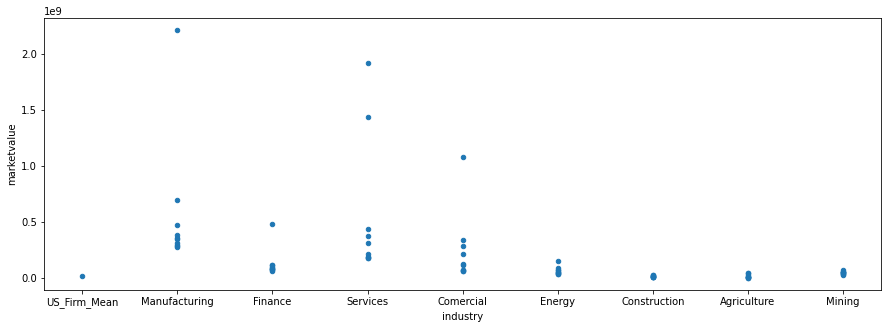

In [65]:
firm_marketvalue_mean_us = df_final_size_us['marketvalue'].mean()
#firm_marketvalue_mean_us
df_top10_marketvalue_2d_dict = {'firm':['mean'], 'marketvalue':[firm_marketvalue_mean_us], 'industry':['US_Firm_Mean']}
for industry in industry_list:
    df_top10_marketvalue_2d_dict['firm'].extend(industry_top10_marketvalue_dic[industry]['firm'])
    df_top10_marketvalue_2d_dict['marketvalue'].extend(industry_top10_marketvalue_dic[industry]['marketvalue'])
    
    for count in range(len(industry_top10_marketvalue_dic[industry]['firm'])):
        df_top10_marketvalue_2d_dict['industry'].append(industry)

df_top10_marketvalue_2d = pd.DataFrame(df_top10_marketvalue_2d_dict)
df_top10_marketvalue_2d.plot('industry', 'marketvalue', kind ='scatter', figsize=(15,5))

Considering the whole history of financial data for all firms:

1, How can you measure firm profitability that can be used to compare performance among firms of different sizes? 

Select and justify at least 3 measures and show descriptive statistics


2, Calculate and explain earnings per share deflated by price.